In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("major-tech-stock-2019-2024.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6290 non-null   object 
 1   Open       6290 non-null   float64
 2   High       6290 non-null   float64
 3   Low        6290 non-null   float64
 4   Close      6290 non-null   float64
 5   Adj Close  6290 non-null   float64
 6   Volume     6290 non-null   int64  
 7   Ticker     6290 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 393.3+ KB
None


In [4]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2019-01-02  38.722500  39.712502  38.557499  39.480000  37.793785   
1  2019-01-03  35.994999  36.430000  35.500000  35.547501  34.029243   
2  2019-01-04  36.132500  37.137501  35.950001  37.064999  35.481926   
3  2019-01-07  37.174999  37.207500  36.474998  36.982498  35.402950   
4  2019-01-08  37.389999  37.955002  37.130001  37.687500  36.077847   

      Volume Ticker  
0  148158800   AAPL  
1  365248800   AAPL  
2  234428400   AAPL  
3  219111200   AAPL  
4  164101200   AAPL  


In [5]:
print("\nMissing Values:\n",df.isnull().sum())


Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = ['Ticker','Date']).reset_index(drop=True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793785,148158800,AAPL
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800,AAPL
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481926,234428400,AAPL
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200,AAPL
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077847,164101200,AAPL


In [8]:
df.to_csv("clean-tech-stock.csv", index = False)

In [9]:
# Group by company ticker
df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change() * 100

# Display first few rows
print(df[['Date', 'Ticker', 'Adj Close', 'Daily Return']].head(10))

        Date Ticker  Adj Close  Daily Return
0 2019-01-02   AAPL  37.793785           NaN
1 2019-01-03   AAPL  34.029243     -9.960743
2 2019-01-04   AAPL  35.481926      4.268924
3 2019-01-07   AAPL  35.402950     -0.222580
4 2019-01-08   AAPL  36.077847      1.906328
5 2019-01-09   AAPL  36.690502      1.698149
6 2019-01-10   AAPL  36.807777      0.319634
7 2019-01-11   AAPL  36.446388     -0.981828
8 2019-01-14   AAPL  35.898346     -1.503694
9 2019-01-15   AAPL  36.633076      2.046695


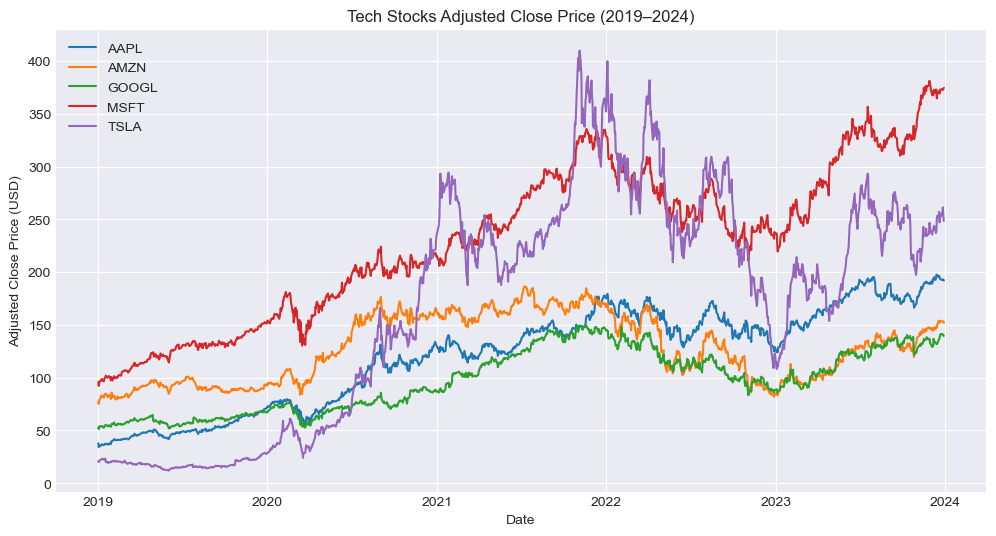

In [10]:
# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Plot Adjusted Close over time for each company
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Adj Close'], label=ticker)

plt.title("Tech Stocks Adjusted Close Price (2019–2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.legend()
plt.show()

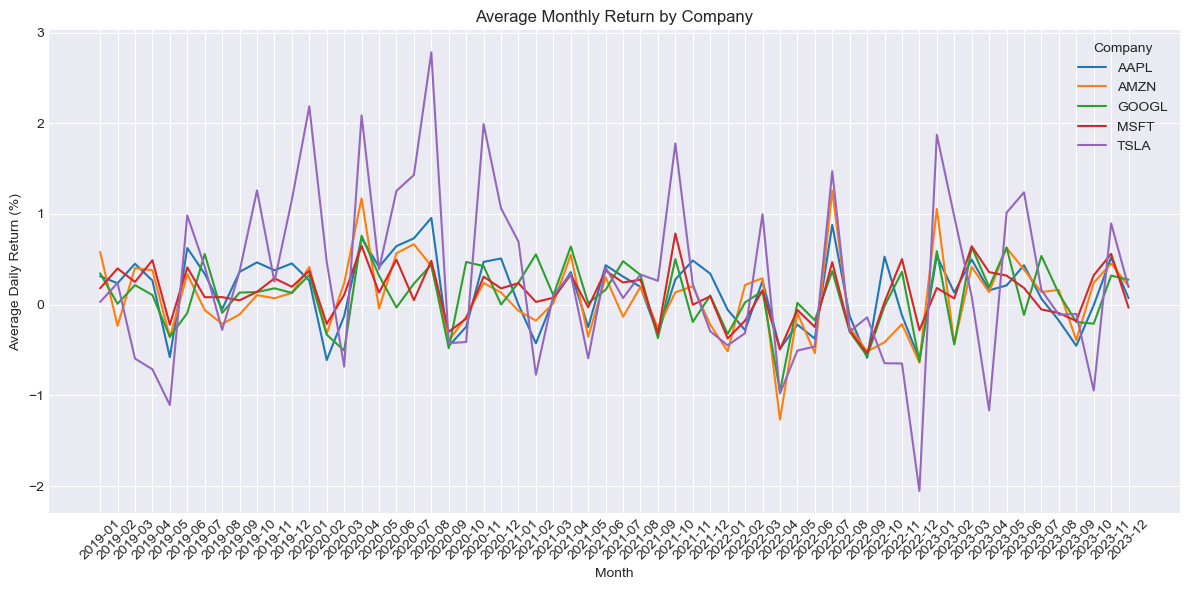

In [11]:
# Extract month-year for grouping
df['Month'] = df['Date'].dt.to_period('M')

# Calculate mean monthly return
monthly_return = df.groupby(['Ticker', 'Month'])['Daily Return'].mean().reset_index()

# 🔧 FIX: convert Period to string for plotting
monthly_return['Month'] = monthly_return['Month'].astype(str)


plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Daily Return', hue='Ticker', data=monthly_return)
plt.title('Average Monthly Return by Company')
plt.xlabel('Month')
plt.ylabel('Average Daily Return (%)')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# 💾 Save Monthly Average Returns to CSV
monthly_return.to_csv("monthly_avg_returns.csv", index=False)
print("✅ Saved: monthly_avg_returns.csv")

# Optional: preview top rows
print("\n📊 Sample of Monthly Average Returns:")
print(monthly_return.head(10))

✅ Saved: monthly_avg_returns.csv

📊 Sample of Monthly Average Returns:
  Ticker    Month  Daily Return
0   AAPL  2019-01      0.313739
1   AAPL  2019-02      0.235686
2   AAPL  2019-03      0.451207
3   AAPL  2019-04      0.265714
4   AAPL  2019-05     -0.579529
5   AAPL  2019-06      0.624330
6   AAPL  2019-07      0.340904
7   AAPL  2019-08     -0.049343
8   AAPL  2019-09      0.361351
9   AAPL  2019-10      0.466164
